In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import tarfile
from pandas.errors import EmptyDataError
import time

In [ ]:
train=pd.read_csv('Combined_IoT_profiling_dataset_2022_train_set.csv')
train=train.iloc[:,1:]
test=pd.read_csv('Combined_IoT_profiling_dataset_2022_test_set.csv')
test=test.iloc[:,1:]

In [ ]:
print("Columns in Dataset: ",train.columns)

Columns in Dataset:  Index(['L4_tcp', 'L4_udp', 'L7_http', 'L7_https', 'port_class_src',
       'port_class_dst', 'pck_size', 'ip_dst_new', 'ethernet_frame_size ',
       'ttl', 'total_length', 'protocol ', 'source_port', 'dest_port',
       'DNS_count', 'NTP_count', 'ARP_count', 'cnt', 'L3_ip_dst_count',
       'most_freq_d_ip', 'most_freq_prot', 'most_freq_sport',
       'most_freq_dport', 'sum_et', 'min_et', 'max_et', 'med_et', 'average_et',
       'skew_et', 'kurt_et', 'var', 'q3', 'q1', 'iqr', 'sum_e', 'min_e',
       'max_e', 'med', 'average', 'skew_e', 'kurt_e', 'var_e', 'q3_e', 'q1_e',
       'iqr_e', 'epoch_timestamp', 'inter_arrival_time',
       'time_since_previously_displayed_frame', 'label'],
      dtype='object')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184835 entries, 0 to 184834
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   L4_tcp                                 184835 non-null  int64  
 1   L4_udp                                 184835 non-null  int64  
 2   L7_http                                184835 non-null  int64  
 3   L7_https                               184835 non-null  int64  
 4   port_class_src                         184835 non-null  int64  
 5   port_class_dst                         184835 non-null  int64  
 6   pck_size                               184835 non-null  int64  
 7   ip_dst_new                             184835 non-null  int64  
 8   ethernet_frame_size                    184835 non-null  int64  
 9   ttl                                    184835 non-null  int64  
 10  total_length                           184835 non-null  

In [ ]:
train.describe()

,L4_tcp,L4_udp,L7_http,L7_https,port_class_src,port_class_dst,pck_size,ip_dst_new,ethernet_frame_size,ttl,...,average,skew_e,kurt_e,var_e,q3_e,q1_e,iqr_e,epoch_timestamp,inter_arrival_time,time_since_previously_displayed_frame
count,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,1.848350e+05,184835.000000,184835.000000,...,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,184835.000000,1.848350e+05,184835.000000,184835.000000
mean,0.327768,0.666903,0.013407,0.299040,2.165185,2.016939,640.394146,2.152088e+09,674.441204,82.153851,...,640.843250,0.039189,-0.720420,160324.974121,875.083867,414.391656,460.692211,1.633947e+09,0.050033,12.417861
std,0.469401,0.471322,0.115008,0.457838,0.684865,0.637459,574.318207,1.047734e+09,574.266690,56.656853,...,411.322484,1.144770,2.832830,159840.539385,507.178031,511.637163,504.977248,2.317524e+05,0.651935,10.016689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,42.000000,0.000000,...,0.000000,-4.129483,-3.000000,0.000000,0.000000,0.000000,0.000000,1.632854e+09,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,32.000000,1.153216e+09,66.000000,64.000000,...,266.571429,-0.381374,-1.966667,2048.000000,361.750000,32.000000,0.000000,1.634040e+09,0.000000,3.577324
50%,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,408.000000,2.211110e+09,442.000000,64.000000,...,638.800000,0.000000,-1.500000,138323.916667,1040.000000,72.500000,258.000000,1.634045e+09,0.000618,10.652390
75%,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1096.000000,3.232271e+09,1130.000000,64.000000,...,989.000000,0.613385,-0.569731,268324.000000,1324.000000,1021.750000,890.750000,1.634060e+09,0.009252,19.555623
max,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1480.000000,4.294967e+09,1514.000000,255.000000,...,1480.000000,4.129483,15.052632,532900.000000,1480.000000,1480.000000,1460.000000,1.634146e+09,112.991367,266.836806


In [ ]:
train['label'].value_counts()

,count
label,
Camera_simcam,27373
Camera_homeeyecam,22128
Camera_arloqcam,17558
Camera_arlobasecam,17384
Camera_luohecam,16060
Camera_amcrest,14689
Camera_dlinkcam,11279
Camera_heimvisioncam,11029
Home Automation_eufyhomebase,8805


# Data Clearning

In [ ]:
# Removing infinity and nan values
train.replace(np.inf,np.nan,inplace=True)
train.replace(-np.inf,np.nan,inplace=True)
train.dropna(inplace=True)
test.replace(np.inf,np.nan,inplace=True)
test.replace(-np.inf,np.nan,inplace=True)
test.dropna(inplace=True)

In [ ]:
#Removing duplicates
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [ ]:
train.shape

(183959, 49)

<Axes: >

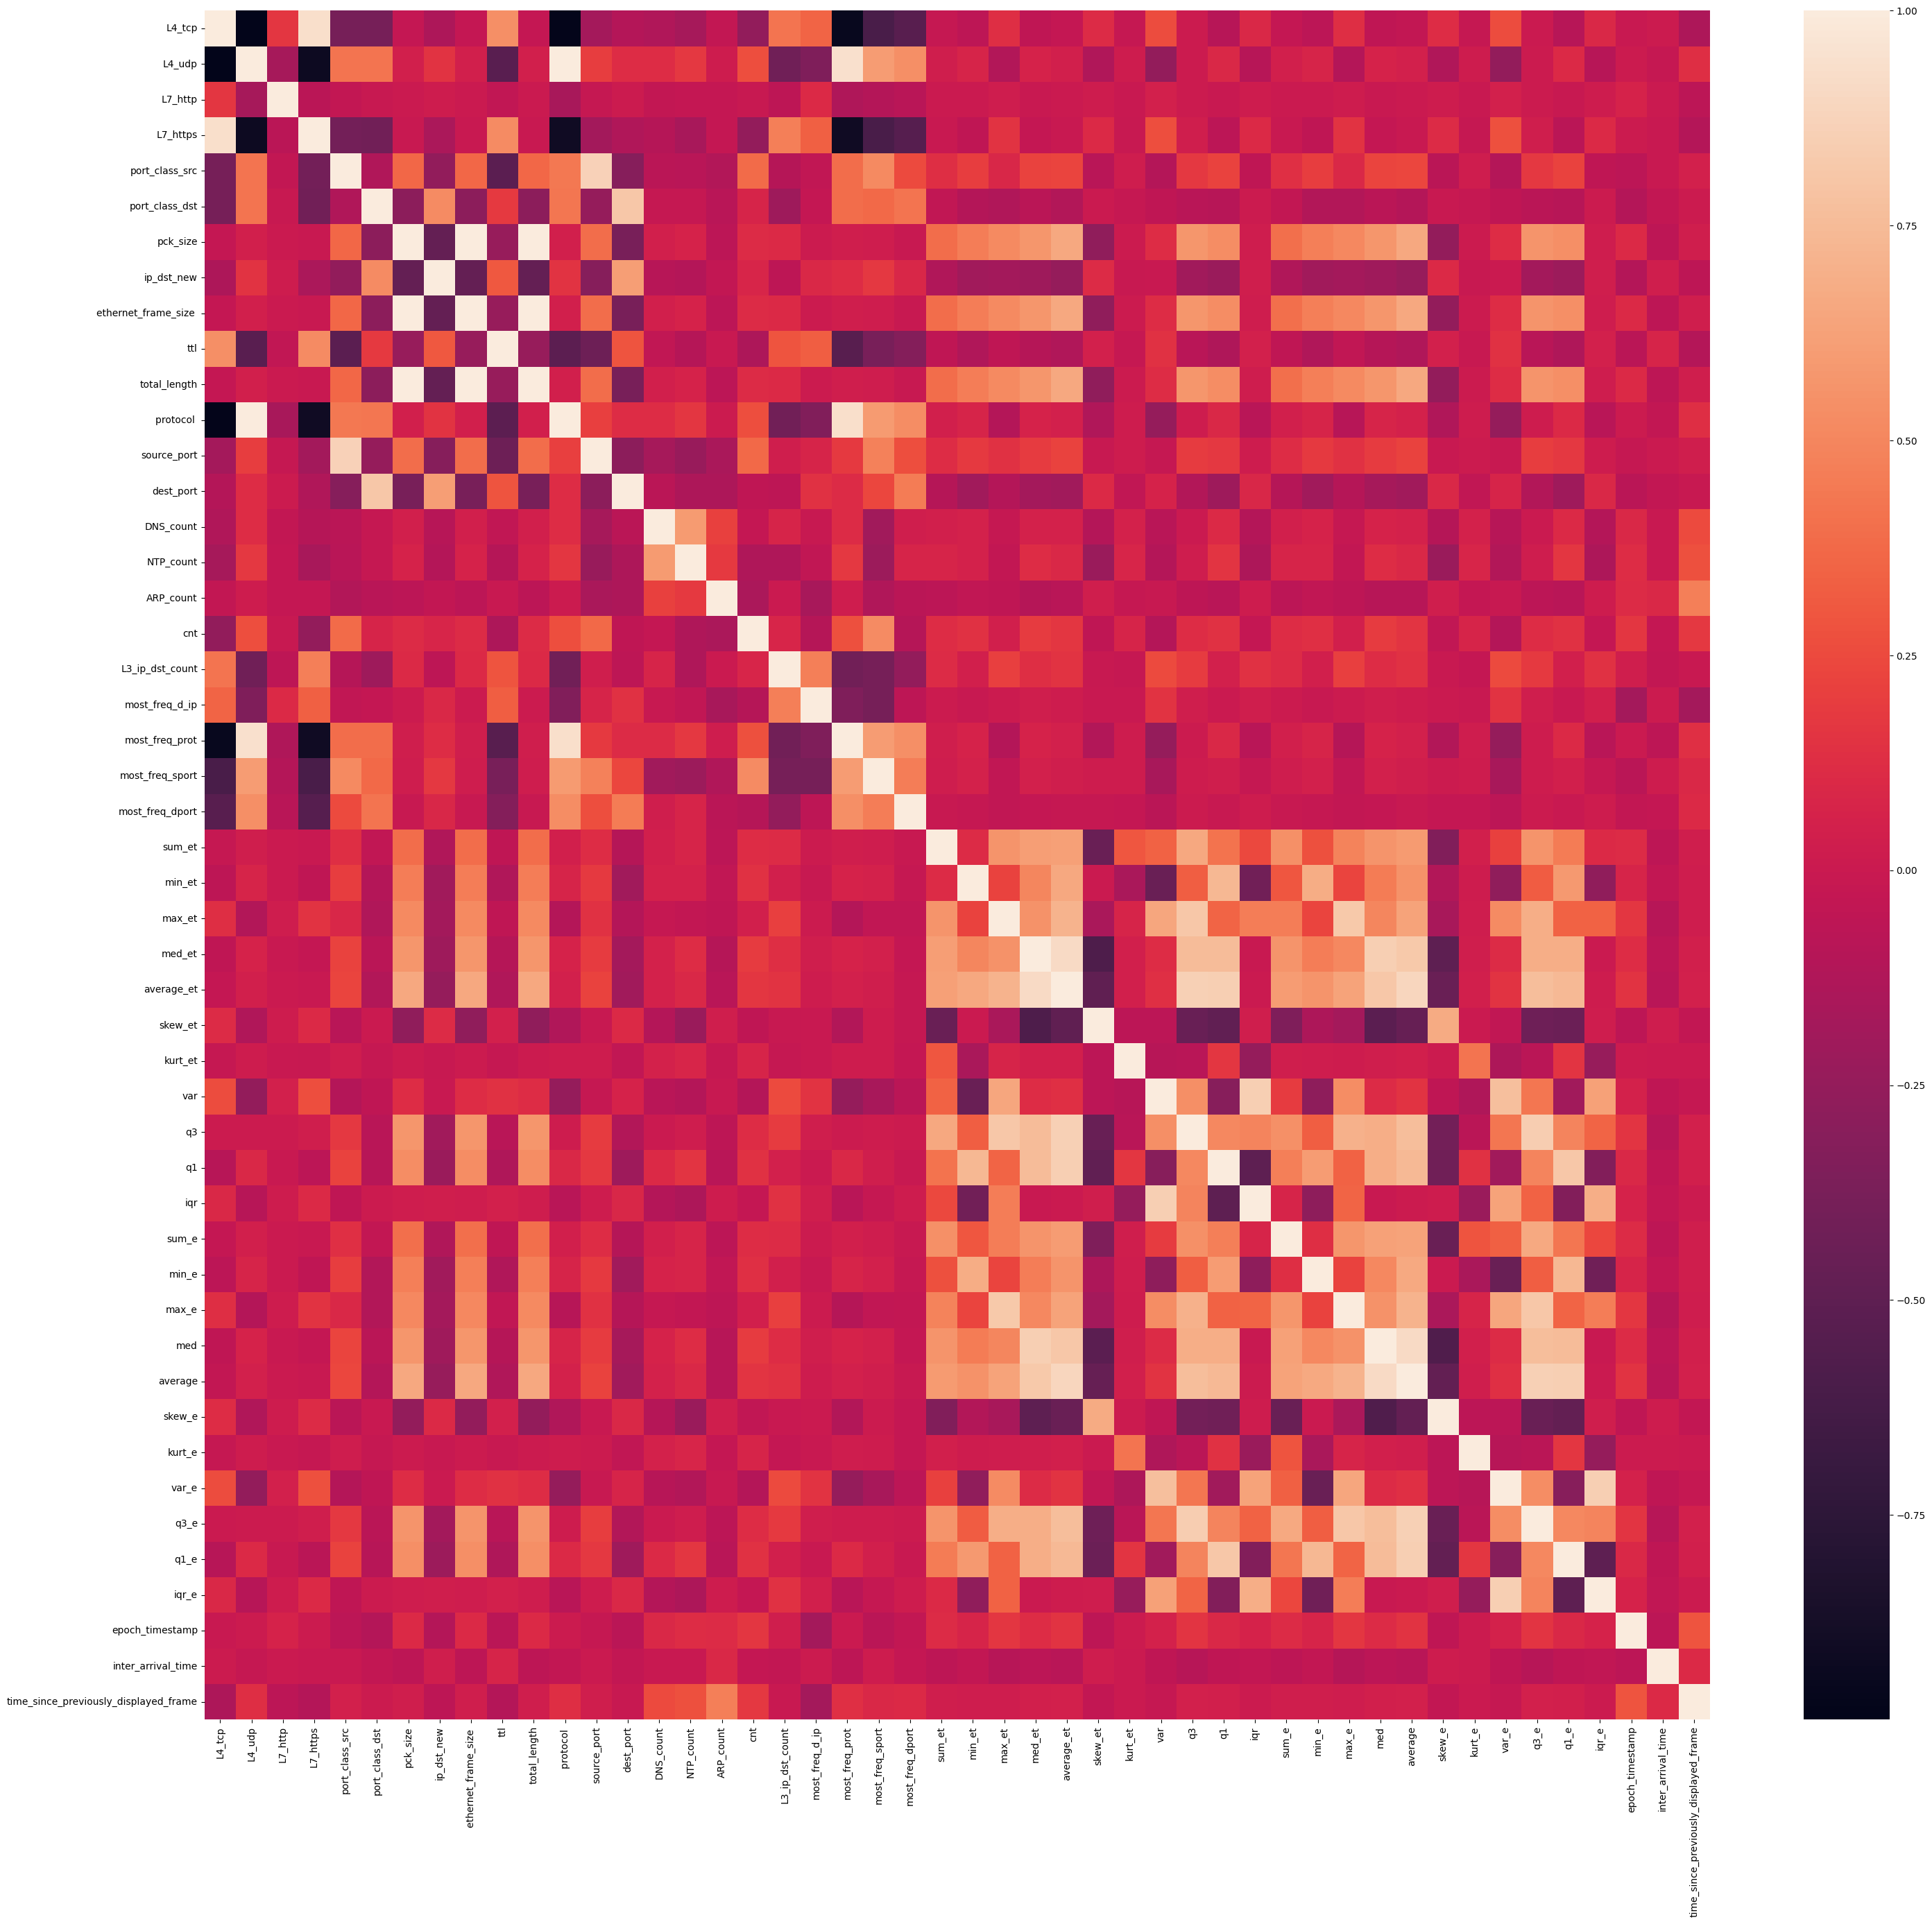

In [ ]:
#Finding and plotting correlations
corr = train.corr(numeric_only=True)
plt.figure(figsize=(35, 32))
sns.heatmap(corr)

In [ ]:
corr_cols=['L7_https','most_freq_sport','most_freq_dport','most_freq_prot','min_et', 'max_et','med_et','average_et','q3','q1', 'min_e', 'max_e', 'med', 'average', 'q3_e', 'q1_e' , 'time_since_previously_displayed_frame','port_class_src','port_class_dst','pck_size','total_length','ip_dst_new', 'L4_tcp', 'NTP_count','most_freq_d_ip','sum_e','skew_e', 'iqr','var','iqr_e','L4_udp']
train.drop(columns=corr_cols,axis=1,inplace=True)
test.drop(columns=corr_cols,axis=1,inplace=True)

<Axes: >

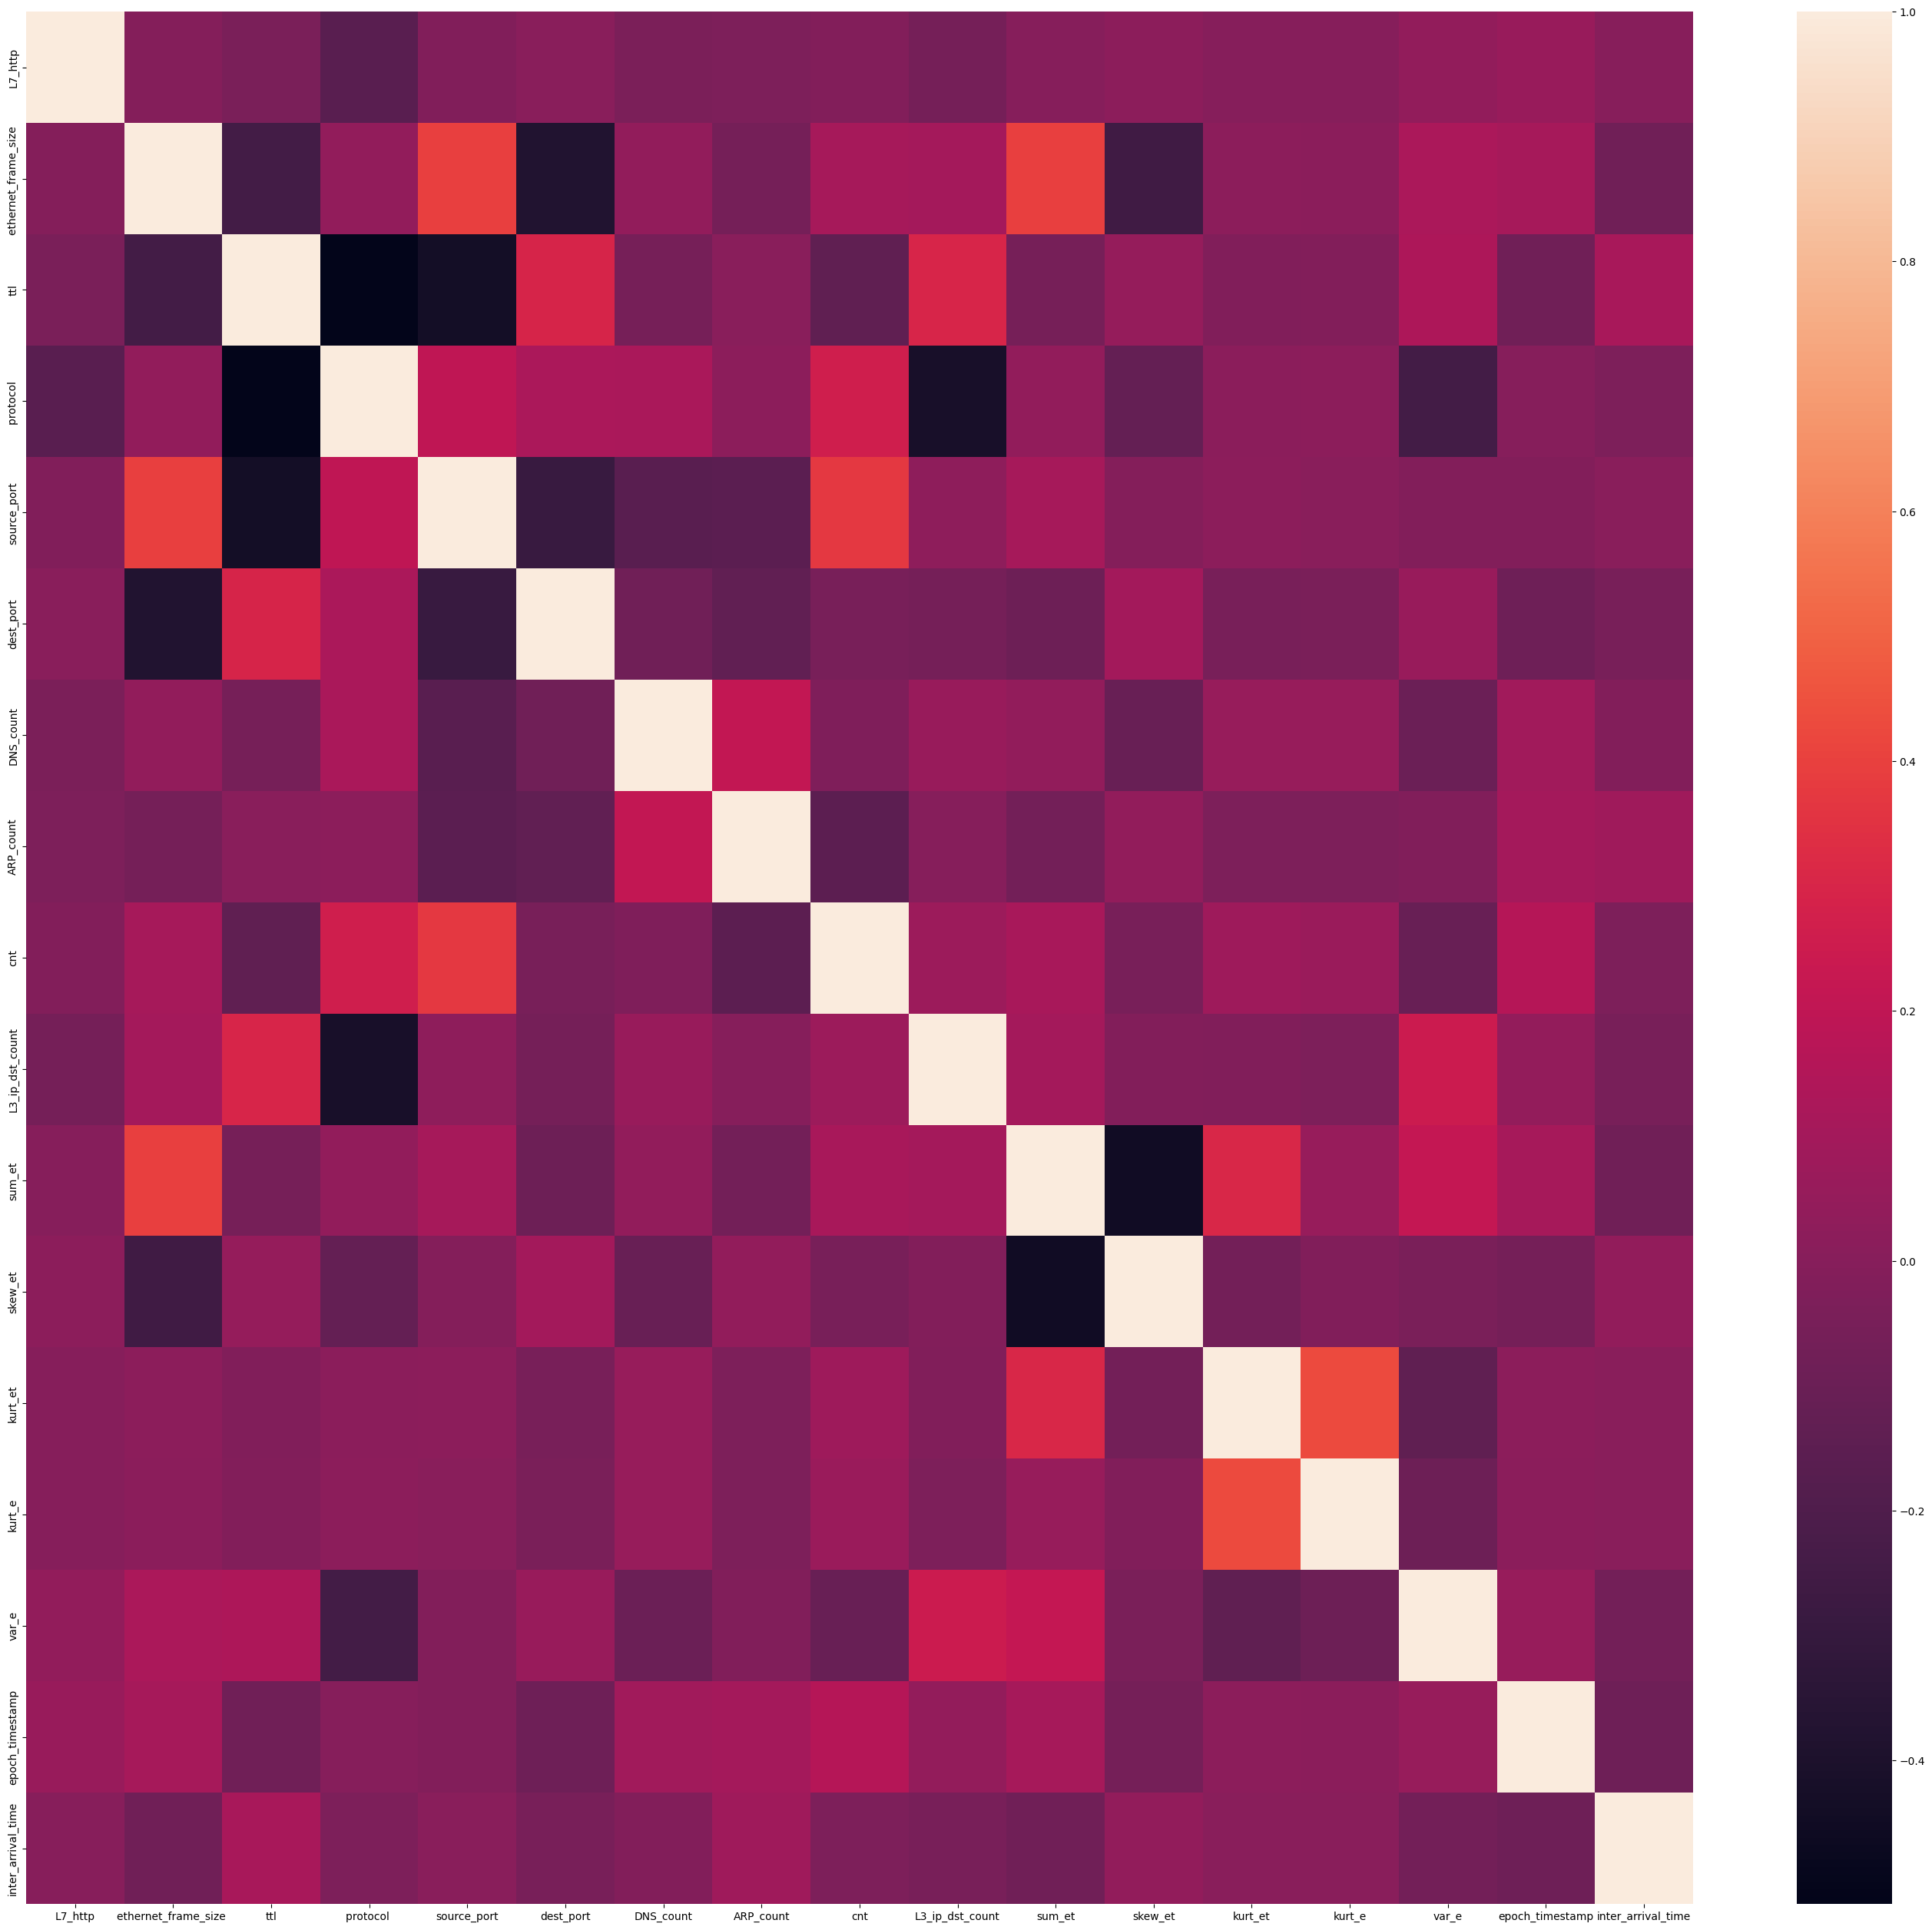

In [ ]:
#Finding and plotting correlations
corr = test.corr(numeric_only=True)
plt.figure(figsize=(35, 32))
sns.heatmap(corr)

In [ ]:
train.shape

(183959, 18)

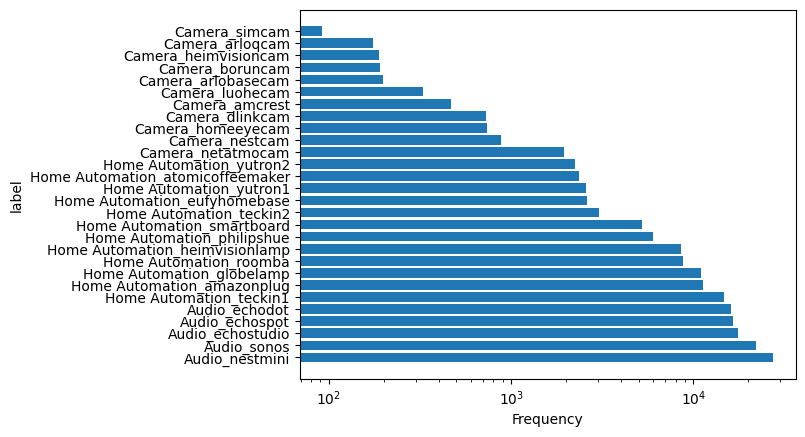

In [ ]:
plt.barh(train['label'].unique(), train['label'].value_counts())


plt.xlabel("Frequency")
plt.xscale('log')

plt.ylabel("label")

plt.show()

# Merging classes

In [ ]:
train_df=train.copy()
mask = train_df['label'].str.contains('Camera')
train_df.loc[mask, 'label'] = 'Camera'
mask = train_df['label'].str.contains('Audio')
train_df.loc[mask, 'label'] = 'Audio'
mask = train_df['label'].str.contains('Home Automation')
train_df.loc[mask, 'label'] = 'Home Automation'

In [ ]:
test_df=test.copy()
mask = test_df['label'].str.contains('Camera')
test_df.loc[mask, 'label'] = 'Camera'
mask = test_df['label'].str.contains('Audio')
test_df.loc[mask, 'label'] = 'Audio'
mask = test_df['label'].str.contains('Home Automation')
test_df.loc[mask, 'label'] = 'Home Automation'

In [ ]:
train_df['label'].value_counts()

,count
label,
Camera,153102
Home Automation,15842
Audio,15015


In [ ]:
test_df['label'].value_counts()

,count
label,
Camera,38452
Home Automation,3971
Audio,3761


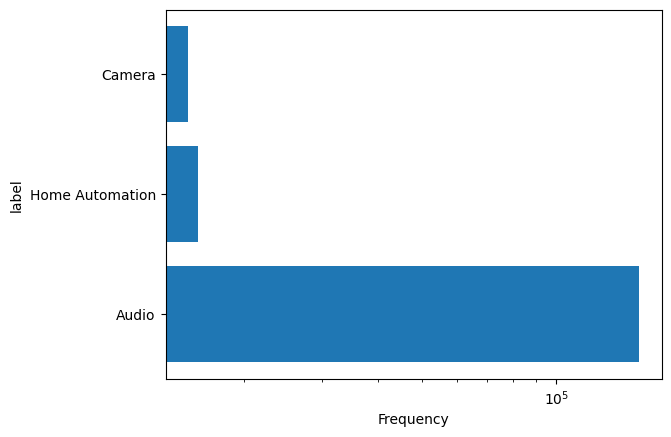

In [ ]:
plt.barh(train_df['label'].unique(), train_df['label'].value_counts())


plt.xlabel("Frequency")
plt.xscale('log')

plt.ylabel("label")

plt.show()

In [ ]:
label_encoder = LabelEncoder()
train_df['label']=label_encoder.fit_transform(train_df['label'])
train_df['label'].unique()

array([0, 2, 1])

In [ ]:
label_encoder = LabelEncoder()
test_df['label']=label_encoder.fit_transform(test_df['label'])
test_df['label'].unique()

array([0, 2, 1])

In [ ]:

train_X=train_df.drop(columns='label')
train_y=train_df['label'].astype('int')
test_X=test_df.drop(columns='label')
test_y=test_df['label'].astype('int')

In [ ]:
#Random undersampling for balancing data
rus = RandomUnderSampler(random_state=0)
train_X_rus, train_y_rus = rus.fit_resample(train_X, train_y)
test_X_rus, test_y_rus = rus.fit_resample(test_X, test_y)

In [ ]:
train_y_rus.value_counts()

,count
label,
0,15015
1,15015
2,15015


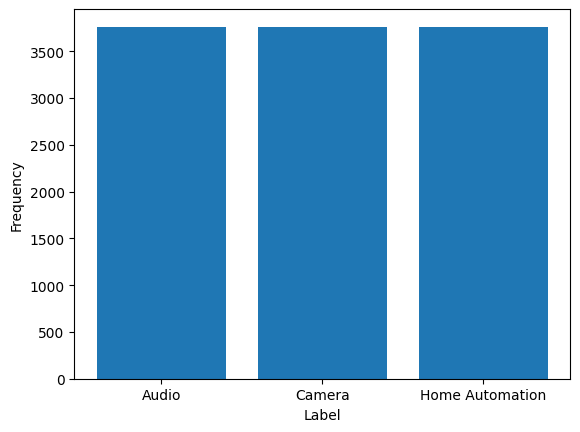

In [ ]:
x=[]
for c in test_y_rus.unique():
  if c==1:
    x.append('Camera')
  elif c==2:
    x.append('Home Automation')
  else:
     x.append('Audio')
plt.bar(x, test_y_rus.value_counts())


plt.xlabel("Label")


plt.ylabel("Frequency")

plt.show()

In [ ]:
# Feature scaling
Minmax=MinMaxScaler()
train_x_rus=Minmax.fit_transform(train_X_rus)
test_x_rus=Minmax.fit_transform(test_X_rus)

Best parameters of xgboost:  {'learning_rate': 0.01, 'max_depth': 3}
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      4225
           1       0.80      0.97      0.88      3102
           2       0.98      0.93      0.95      3956

    accuracy                           0.92     11283
   macro avg       0.92      0.93      0.92     11283
weighted avg       0.93      0.92      0.92     11283



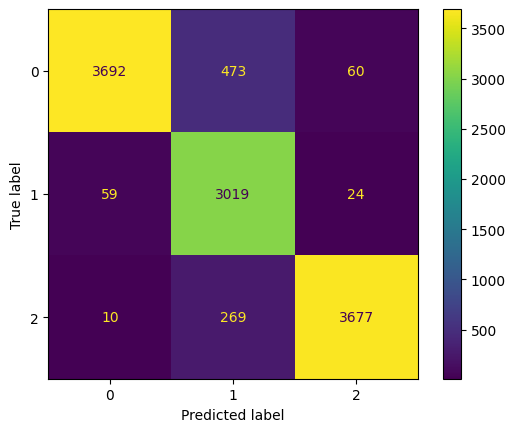

Model training time elapsed:  29.348950624465942
Model testing time elapsed:  0.02904653549194336


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
train_start=time.time()
param_grid = {
    'max_depth': [2,3],
    'learning_rate': [ 0.01, 0.001]
}
# Create an instance of the XGBClassifier
xgb = XGBClassifier(objective='multi:softprob')
model = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
model.fit(train_x_rus, train_y_rus)
print("Best parameters of xgboost: ",model.best_params_)
train_end=time.time()
test_start=time.time()
predictions = model.predict(test_x_rus)
new = np.asarray(test_y_rus)
test_end=time.time()
cm=confusion_matrix(predictions,test_y_rus,labels=model.classes_)
print(classification_report(predictions,test_y_rus))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

train_time_elapsed_xgb=train_end-train_start
test_time_elapsed_xgb=test_end-test_start
print("Model training time elapsed: ", train_time_elapsed_xgb)
print("Model testing time elapsed: ", test_time_elapsed_xgb)

Best parameters of Random Forest:  {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      4262
           1       0.87      0.97      0.92      3394
           2       0.96      1.00      0.98      3627

    accuracy                           0.94     11283
   macro avg       0.94      0.94      0.94     11283
weighted avg       0.94      0.94      0.94     11283



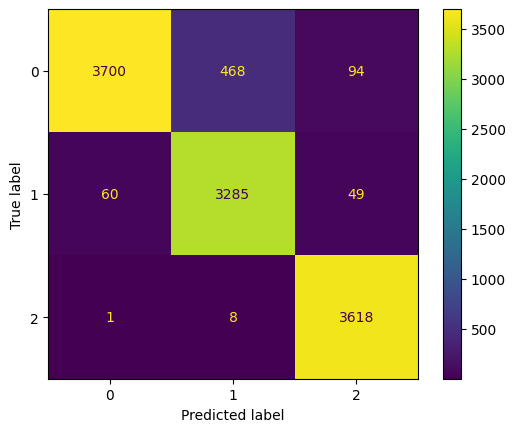

Model training time elapsed:  283.14888620376587
Model test time elapsed:  0.08918142318725586


In [ ]:
from sklearn.ensemble import RandomForestClassifier
train_start=time.time()
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators': [10,100,200],
    'max_depth':[2,3,4]
}
rf = RandomForestClassifier(random_state = 42)
classifier = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
classifier.fit(train_x_rus, train_y_rus)
print("Best parameters of Random Forest: ",classifier.best_params_)
train_end=time.time()
test_start=time.time()
predictions = classifier.predict(test_x_rus)
new = np.asarray(test_y_rus)
test_end=time.time()
cm=confusion_matrix(predictions,test_y_rus,labels=classifier.classes_)
print(classification_report(predictions,test_y_rus))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

train_time_elapsed_rf=train_end-train_start
test_time_elapsed_rf=test_end-test_start
print("Model training time elapsed: ",train_time_elapsed_rf)
print("Model test time elapsed: ",test_time_elapsed_rf)

Best parameters of SVM:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3871
           1       0.94      0.97      0.96      3649
           2       0.97      0.97      0.97      3763

    accuracy                           0.97     11283
   macro avg       0.97      0.97      0.97     11283
weighted avg       0.97      0.97      0.97     11283



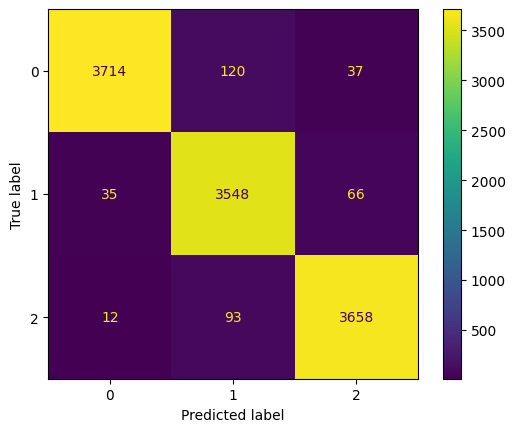

Model training time elapsed:  5020.549070119858
Model test time elapsed:  5025.598603010178


In [ ]:
from sklearn import svm
train_start=time.time()
param_grid = {
   'kernel':['rbf','linear'],
   'C':[ 0.1, 1,0.01],
   'gamma':[ 0.1, 1,0.01]
}

svm_model = svm.SVC()
rbf= GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
rbf.fit(train_x_rus, train_y_rus)
print("Best parameters of SVM: ",rbf.best_params_)
train_end=time.time()
test_start=time.time()
predictions = rbf.predict(test_x_rus)
new = np.asarray(test_y_rus)
test_end=time.time()
cm=confusion_matrix(predictions,test_y_rus,labels=rbf.classes_)
print(classification_report(predictions,test_y_rus))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf.classes_)
disp.plot()
plt.show()

train_time_elapsed_svm=train_end-train_start
test_time_elapsed_svm=test_end-train_start
print("Model training time elapsed: ", train_time_elapsed_svm)
print("Model test time elapsed: ", test_time_elapsed_svm)